<span style="font-size:30pt;"><b>Exploratory Data Analysis Python</b></span>

Example notebook on how to use the `edapy` package.

# Import Packages

In [1]:
import pandas as pd
import edapy
import edapy.plotting as ep


%load_ext autoreload
%autoreload 2

# Import Data

In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!mv AirQualityUCI.zip data/AirQualityUCI.zip
!unzip data/AirQualityUCI.zip
!mv german.data data/german.data

--2022-01-22 13:46:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1,5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1,47M   657KB/s    in 2,3s    

2022-01-22 13:46:23 (657 KB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



--2022-01-19 17:39:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77,92K   133KB/s    in 0,6s    

2022-01-19 17:39:07 (133 KB/s) - ‘german.data’ saved [79793/79793]



In [3]:
data = pd.read_csv('german.data', delimiter=' ', header=None)
data.columns = [
    'account_bal','duration','payment_status','purpose',
    'credit_amount','savings_bond_value','employed_since',
    'intallment_rate','sex_marital','guarantor','residence_since',
    'most_valuable_asset','age','concurrent_credits','type_of_housing',
    'number_of_existcr','job','number_of_dependents','telephon',
    'foreign','target'
]
data = data.replace(
    ['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
    ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled', 'none','car','life_insurance','real_estate']
)
col_target = 'target'
cols_numeric = [c for c in data.sample(100).select_dtypes('number').columns if c != col_target]
cols_categorical = [c for c in data.sample(100).select_dtypes(exclude='number').columns]

In [41]:
time_data = pd.read_csv('AirQualityUCI.csv', sep=';')
time_data = time_data.dropna(how='all', axis=0)
time_data['Date'] = pd.to_datetime(time_data['Date'])
time_data['Time'] = time_data['Time'].apply(lambda x: x[:2])
time_data['Day Of Week'] = time_data['Date'].dt.day_name()

# Numerical DataTypes

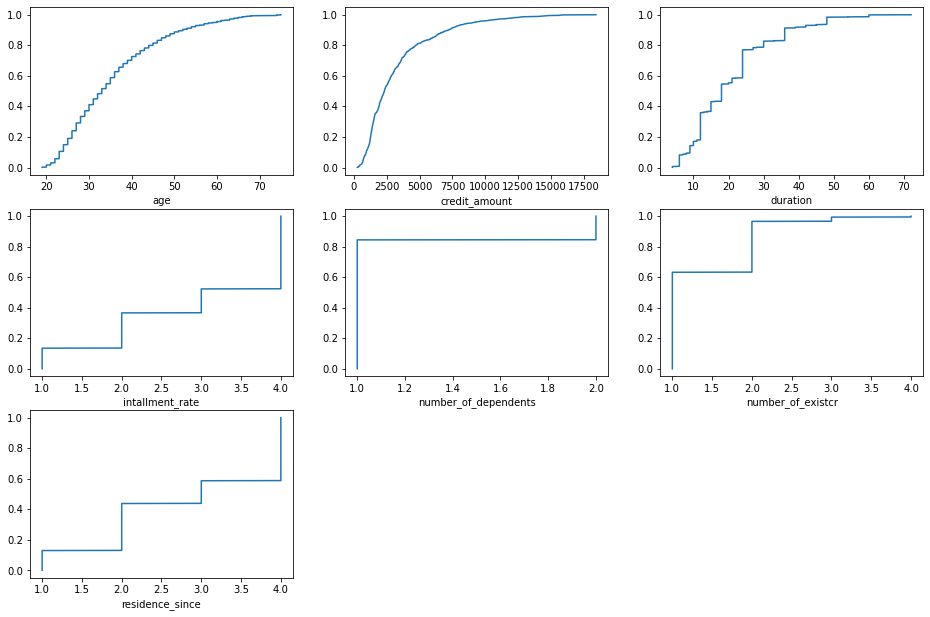

In [4]:
fig, axes = ep.ecdf_numerical(data, cols_numeric, hue=None)

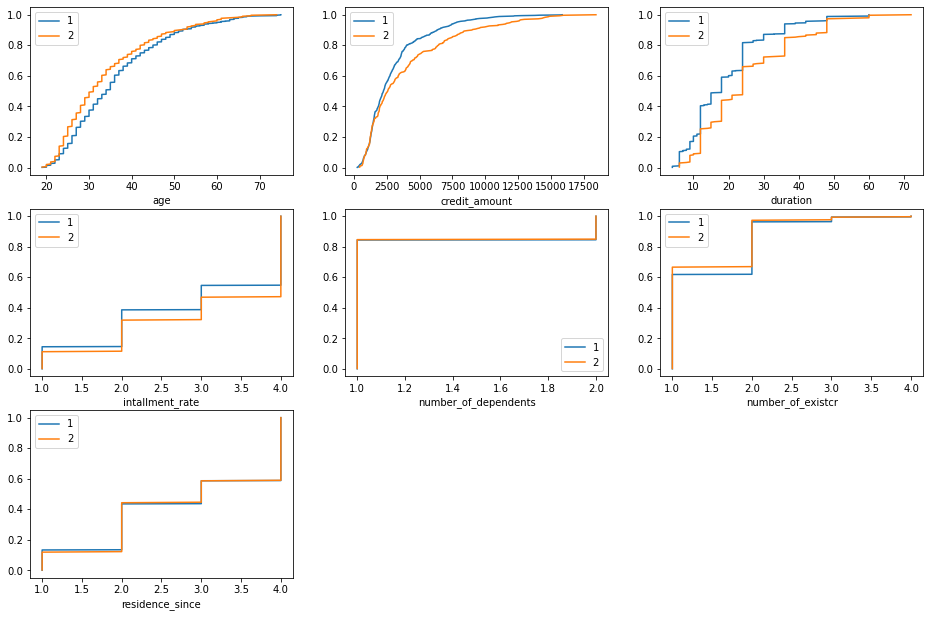

In [5]:
fig, axes = ep.ecdf_numerical(data, cols_numeric, hue=col_target)

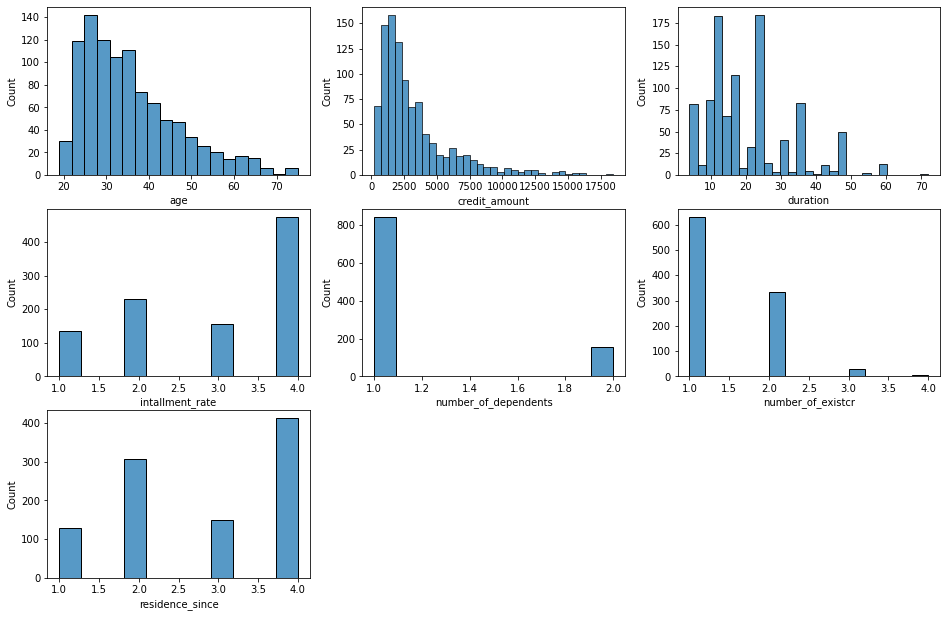

In [6]:
fig, axes = ep.pdf_numerical(data, cols_numeric, hue=None)

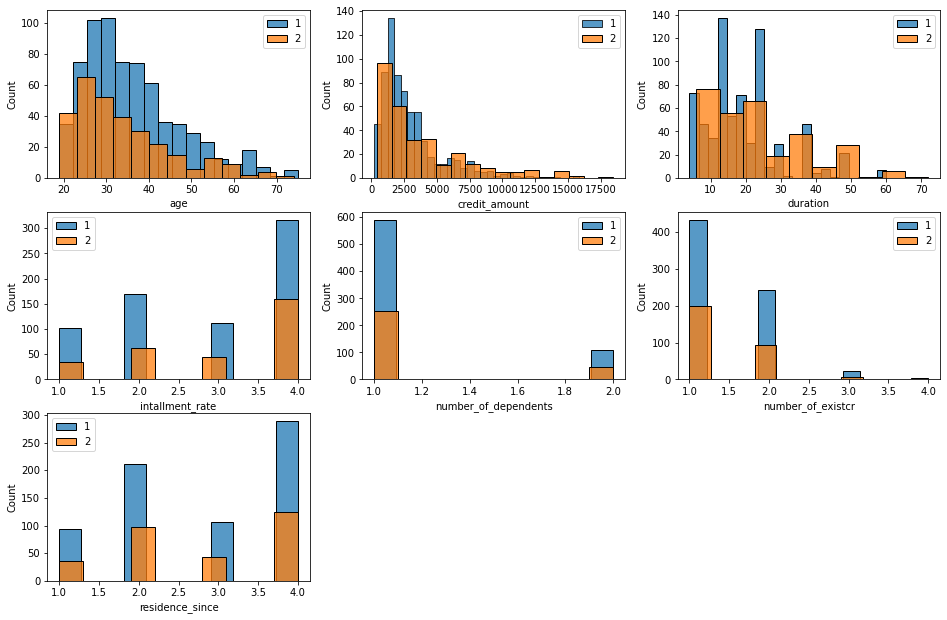

In [7]:
fig, axes = ep.pdf_numerical(data, cols_numeric, hue=col_target)

# Categorical DataTypes

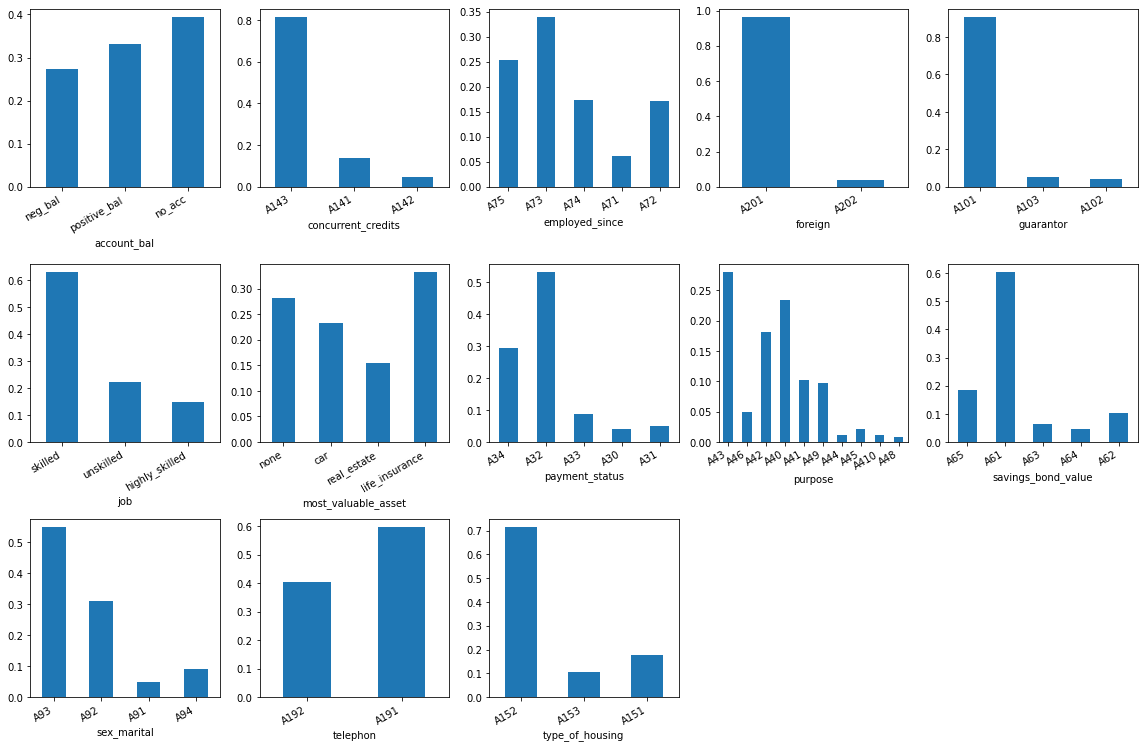

In [8]:
fig, axes = ep.distplot_categorical(data, cols_categorical, col_target=None)

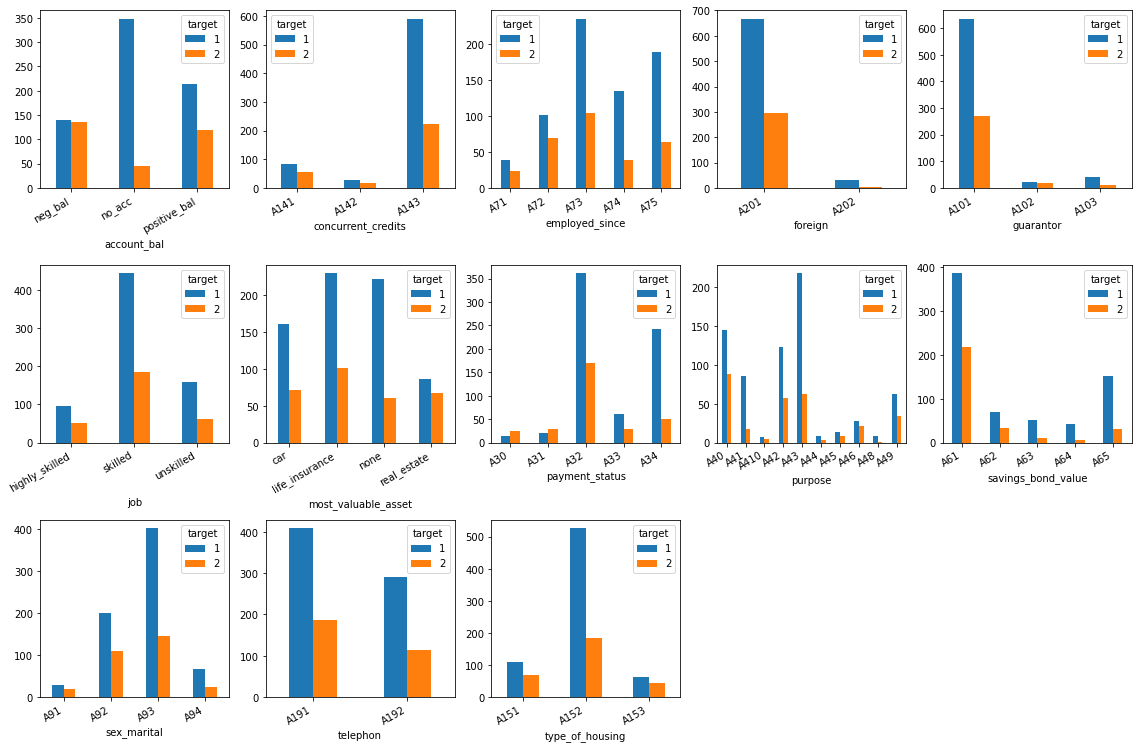

In [9]:
fig, axes = ep.distplot_categorical(data, cols_categorical, col_target=col_target, normalize=False)

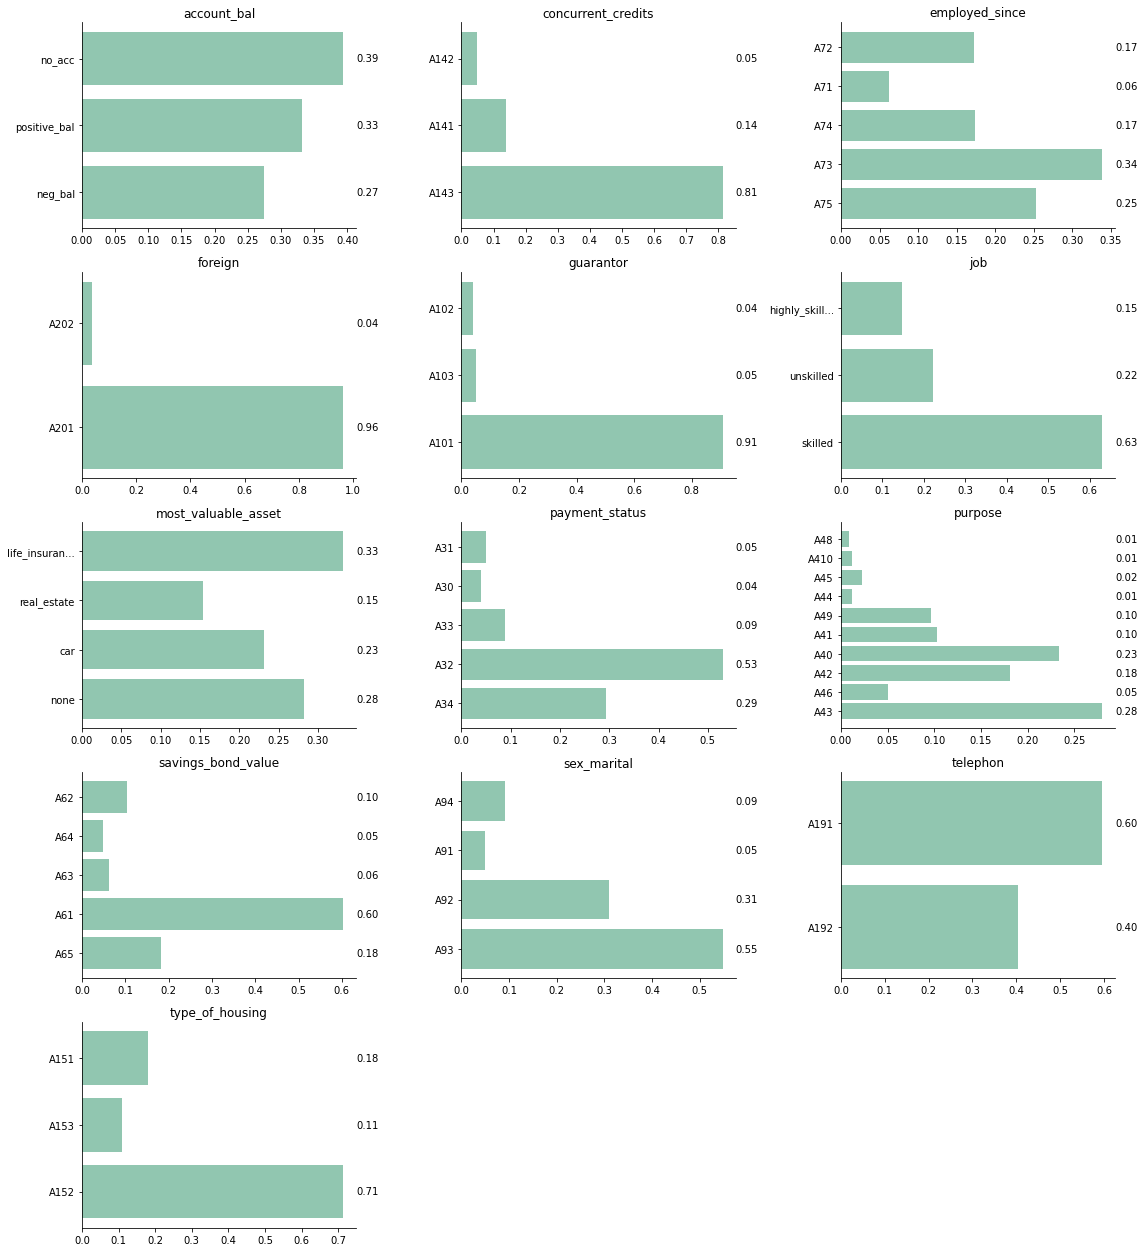

In [10]:
fig, axes = ep.distplot_categorical_pretty(data, cols_categorical)

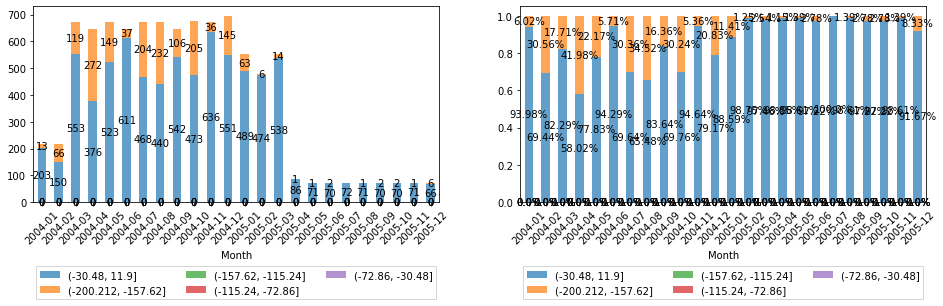

In [75]:
ep.plot_share(time_data, 'Month', 'CO(GT)_binned')

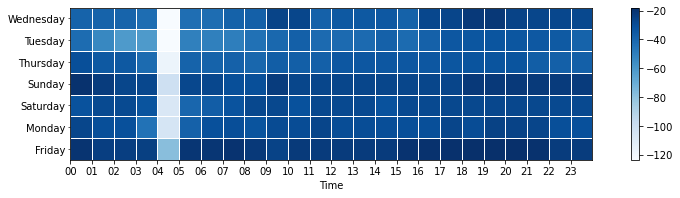

In [122]:
temp_df = time_data.groupby(['Day Of Week', 'Time'])['CO(GT)'].mean().unstack()
ep.waffle_chart(temp_df)

___


**Copyright:**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the [License](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.